Imports

In [1]:
import matplotlib.pyplot as plt
import tensorflow
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

Exploração dos dados

In [3]:
print("Treino:", imagens_treino.shape)
print("Teste:", imagens_teste.shape)
print("Tam. mín. identificacões treino:", min(identificacoes_treino))
print("Tam. máx. identificacões treino:", max(identificacoes_treino))

Treino: (60000, 28, 28)
Teste: (10000, 28, 28)
Tam. mín. identificacões treino: 0
Tam. máx. identificacões treino: 9


Exibição dos dados

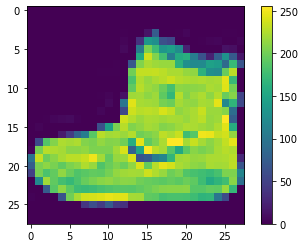

In [4]:
nomes_de_classificacoes = {0: "Camiseta",
                           1: "Calça",
                           2: "Pullover",
                           3: "Vestido",
                           4: "Casaco",
                           5: "Sandália",
                           6: "Camisa",
                           7: "Tênis",
                           8: "Bolsa",
                           9: "Bota"}
"""
for imagem in range(10):
    plt.subplot(2, 5, imagem + 1)
    plt.imshow(imagens_treino[imagem])
    plt.title(nomes_de_classificacoes[identificacoes_treino[imagem]])
"""
plt.imshow(imagens_treino[0])
plt.colorbar()

Normalização dos dados

In [5]:
# normalização
imagens_treino = imagens_treino / float(255)

Criando, compilando, treinando e normalizando o modelo (com dropout)

In [6]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5260 - accuracy: 0.8134 - val_loss: 0.4081 - val_accuracy: 0.8548
Epoch 2/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3988 - accuracy: 0.8568 - val_loss: 0.3819 - val_accuracy: 0.8589
Epoch 3/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3616 - accuracy: 0.8656 - val_loss: 0.3574 - val_accuracy: 0.8693
Epoch 4/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3410 - accuracy: 0.8744 - val_loss: 0.3539 - val_accuracy: 0.8696
Epoch 5/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3247 - accuracy: 0.8800 - val_loss: 0.3276 - val_accuracy: 0.8817
Epoch 6/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3108 - accuracy: 0.8849 - val_loss: 0.3345 - val_accuracy: 0.8809


Sumário do modelo

In [7]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada Dense

In [8]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[-0.01398499,  0.07202657,  0.00348878, ..., -0.00887955,
        -0.01451374,  0.07398116],
       [-0.09615228, -0.07272751,  0.02872938, ..., -0.0059907 ,
         0.02183741,  0.16475208],
       [ 0.01709885, -0.05335473, -0.07903652, ..., -0.03102092,
        -0.10246877, -0.07592579],
       ...,
       [-0.1005213 ,  0.04671346, -0.24719   , ..., -0.08049172,
         0.12368841, -0.09025236],
       [ 0.05010062, -0.05335272, -0.20784591, ...,  0.04128973,
         0.07096024,  0.17365041],
       [ 0.05168254, -0.02708378,  0.02674683, ..., -0.04133316,
        -0.15000476,  0.09685618]], dtype=float32)

In [9]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense

array([ 2.40728348e-01, -9.17796139e-03,  2.03890726e-02,  3.75912078e-02,
        1.90094411e-01, -3.97625379e-03, -1.26573250e-01,  4.44730490e-01,
       -1.14900507e-02,  2.58174390e-01,  3.08689084e-02,  1.72743216e-01,
        2.91720152e-01,  4.47882563e-01,  1.76781937e-01,  1.89994603e-01,
        8.70959908e-02,  1.15076855e-01,  3.93586159e-02,  1.22534782e-01,
        2.20294192e-01, -5.94987646e-02,  5.14174113e-03,  8.95549133e-02,
        9.12159216e-03,  5.31822369e-02,  1.71671048e-01,  1.03508636e-01,
        6.37613386e-02,  1.72345400e-01, -1.33049354e-01,  3.63199592e-01,
       -1.51835550e-02, -4.66535799e-02,  3.06289703e-01,  2.37138063e-01,
        3.56951475e-01,  6.99061202e-03, -1.06827423e-01,  4.42526251e-01,
        1.28696650e-01,  1.25402778e-01,  2.50139296e-01,  1.03471406e-01,
        6.24961376e-01, -1.98072463e-01,  2.22702548e-02,  3.21248770e-01,
       -9.94477980e-03,  1.56640381e-01, -2.59160828e-02, -1.57380447e-01,
        1.94591016e-01,  

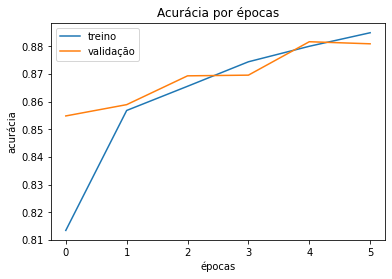

In [10]:
plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.title("Acurácia por épocas")
plt.xlabel("épocas")
plt.ylabel("acurácia")
plt.legend(["treino", "validação"])

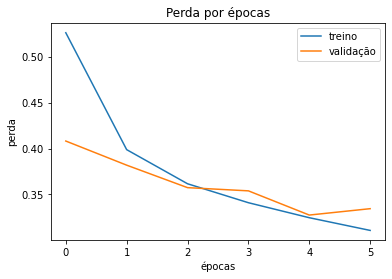

In [11]:
plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.title("Perda por épocas")
plt.xlabel("épocas")
plt.ylabel("perda")
plt.legend(["treino", "validação"])

In [12]:
pesos_camada_dense_zerados = np.zeros((784, 256))
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense])

modelo.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([ 2.40728348e-01, -9.17796139e-03,  2.03890726e-02,  3.75912078e-02,
         1.90094411e-01, -3.97625379e-03, -1.26573250e-01,  4.44730490e-01,
        -1.14900507e-02,  2.58174390e-01,  3.08689084e-02,  1.72743216e-01,
         2.91720152e-01,  4.47882563e-01,  1.76781937e-01,  1.89994603e-01,
         8.70959908e-02,  1.15076855e-01,  3.93586159e-02,  1.22534782e-01,
         2.20294192e-01, -5.94987646e-02,  5.14174113e-03,  8.95549133e-02,
         9.12159216e-03,  5.31822369e-02,  1.71671048e-01,  1.03508636e-01,
         6.37613386e-02,  1.72345400e-01, -1.33049354e-01,  3.63199592e-01,
        -1.51835550e-02, -4.66535799e-02,  3.06289703e-01,  2.37138063e-01,
         3.56951475e-01,  6.99061202e-03, -1.0682742

In [13]:
modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=6, validation_split=0.2)

Epoch 1/6
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5385 - accuracy: 0.8055 - val_loss: 0.4295 - val_accuracy: 0.8429
Epoch 2/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4066 - accuracy: 0.8488 - val_loss: 0.3838 - val_accuracy: 0.8594
Epoch 3/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3742 - accuracy: 0.8634 - val_loss: 0.3904 - val_accuracy: 0.8598
Epoch 4/6
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3555 - accuracy: 0.8680 - val_loss: 0.3554 - val_accuracy: 0.8742
Epoch 5/6
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8757 - val_loss: 0.3388 - val_accuracy: 0.8776
Epoch 6/6
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3209 - accuracy: 0.8814 - val_loss: 0.3504 - val_accuracy: 0.8725


Visualizando as acurácias de treino e validação por época

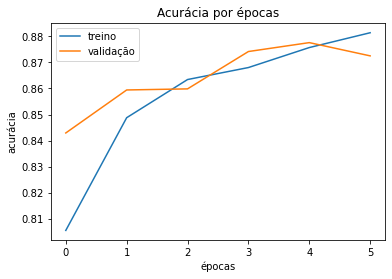

In [14]:
plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.title("Acurácia por épocas")
plt.xlabel("épocas")
plt.ylabel("acurácia")
plt.legend(["treino", "validação"])

Visualizando as perdas de treino e validação por época

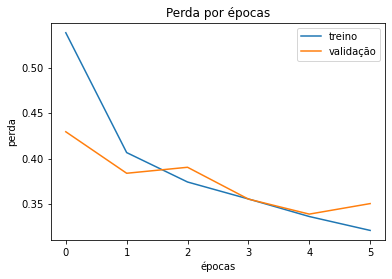

In [15]:
plt.plot(historico.history["loss"])
plt.plot(historico.history["val_loss"])
plt.title("Perda por épocas")
plt.xlabel("épocas")
plt.ylabel("perda")
plt.legend(["treino", "validação"])

Salvando e carregando o modelo treinado

In [16]:
modelo.save("modelo.h5")
modelo_salvo = load_model("modelo.h5")

Testando o modelo

In [17]:
testes = modelo.predict(imagens_teste)
print("Resultado teste:", np.argmax(testes[1]))
print("Número da imagem de teste:", identificacoes_teste[1])

313/313 [==============================] - 1s 2ms/step
Resultado teste: 2
Número da imagem de teste: 2


Avaliando o modelo

In [18]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)

print("Perda do teste:", perda_teste)
print("Acurácia do teste:", acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 61.1529 - accuracy: 0.8318
Perda do teste: 61.152889251708984
Acurácia do teste: 0.8317999839782715


Testando o modelo salvo

In [19]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print("Resultado teste modelo salvo:", np.argmax(testes_modelo_salvo[1]))
print("Número da imagem de teste modelo salvo:", identificacoes_teste[1])

313/313 [==============================] - 0s 1ms/step
Resultado teste modelo salvo: 2
Número da imagem de teste modelo salvo: 2
